In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sn


df = pd.read_csv('/content/drive/MyDrive/EEG data/EEG_data.csv')

In [10]:
df.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1, inplace=True)
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


In [11]:
X = df.drop('user-definedlabeln',axis=1).values
y = df['user-definedlabeln'].values

In [12]:
pt = PowerTransformer()
X_pt = pt.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pt, y, test_size=0.25, random_state=42)

In [13]:
list = []
list2 = []

for c in range (1,51):
  list2.append(c)


for i in range (1, 51):

  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  list.append(metrics.accuracy_score(y_test, y_pred))


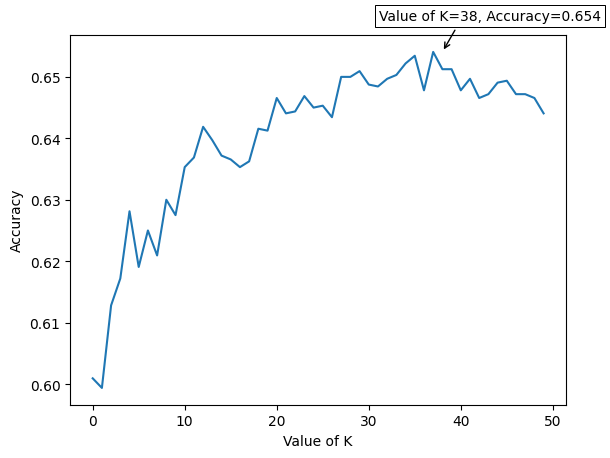

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x_1 = list2
y_1 = list


sn.lineplot(data=y_1) 
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = max(list)
    text= "Value of K={:.0f}, Accuracy={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(1.07,1.07), **kw)

annot_max(x_1,y_1)


#ax.set_ylim(-0.3,1.5)

plt.show()

KNN
____________________________
Accuracy: 0.6540743053387449
Precision: 0.6553006819590824
Recall: 0.6569297700435053
F1 Score: 0.6561142147734326
____________________________
Confusion Matrix: 
 [[1038  556]
 [ 552 1057]]
____________________________
False Positive Rate: 0.3488080301129235
False Negative Rate: 0.3430702299564947
____________________________
AUC: 0.7114435503554739


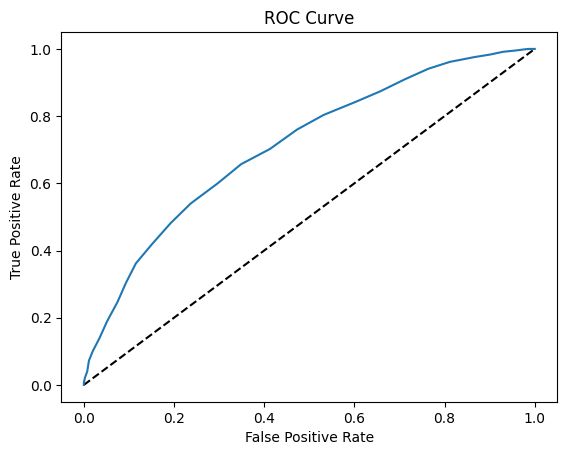

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN")
print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()